### **Welcome Again !!**

**Now we'll Break down each step of the Scikit-learn Workflow !!**


In [1]:
# Let's again clarify the contents

what_were_covering = [
    "0. An end-to-end Scikit-Learn workflow",
    "1. Getting the data ready",
    "2. Choose the right estimator/algorithm for our problems",
    "3. Fit the model/algorithm and use it to make predictions on our data",
    "4. Evaluating a model",
    "5. Improve a model",
    "6. Save and load a trained model",
    "7. Putting it all together!"]

In [2]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## To plot the figure automatically in Notebook.
%matplotlib inline
plt.style.use("seaborn-v0_8-dark-palette")

# **1. Getting Our Data Ready to be used with ML Model !**

- **Data Preprocessing :** It includes various subtasks to get data ready for further processing (Analysis for insights | Training ML Model etc.)

  - **Data Cleaning :** Handling Missing values, outliers and anomalies. Ensuring the Data is as clean and accurate as possible.

  - **Data Transformation :** This involves converting the data into a suitable format for machine learning. It might include encoding categorical variables **(Feature Encoding)**, scaling numeric features, or normalizing the data.

  - **Feature Engineering :** Here, we create new features or modify/combine existing ones, to improve the Performance of ML Models.

- **Data Splitting :** Splitting the Data generally into **Training & Testing Sets**. | For accurate training & evaluation.

##### _Now, Let's view our Data._


In [3]:
# Importing the Data form CSV.

# I know the Data is cleaned, but still let's follow the Workflow Assuming the Data is dirty!!

heart_disease_df = pd.read_csv(
    "../6. Matplotlib - Visualizing Data/CSVs/heart-disease.csv")
heart_disease_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# let's know about columns
heart_disease_df.info()  # 14 Columns. | With correct data Formats.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# Let's See for Missing values.
heart_disease_df.isna().values.any()  # No missing values.

False

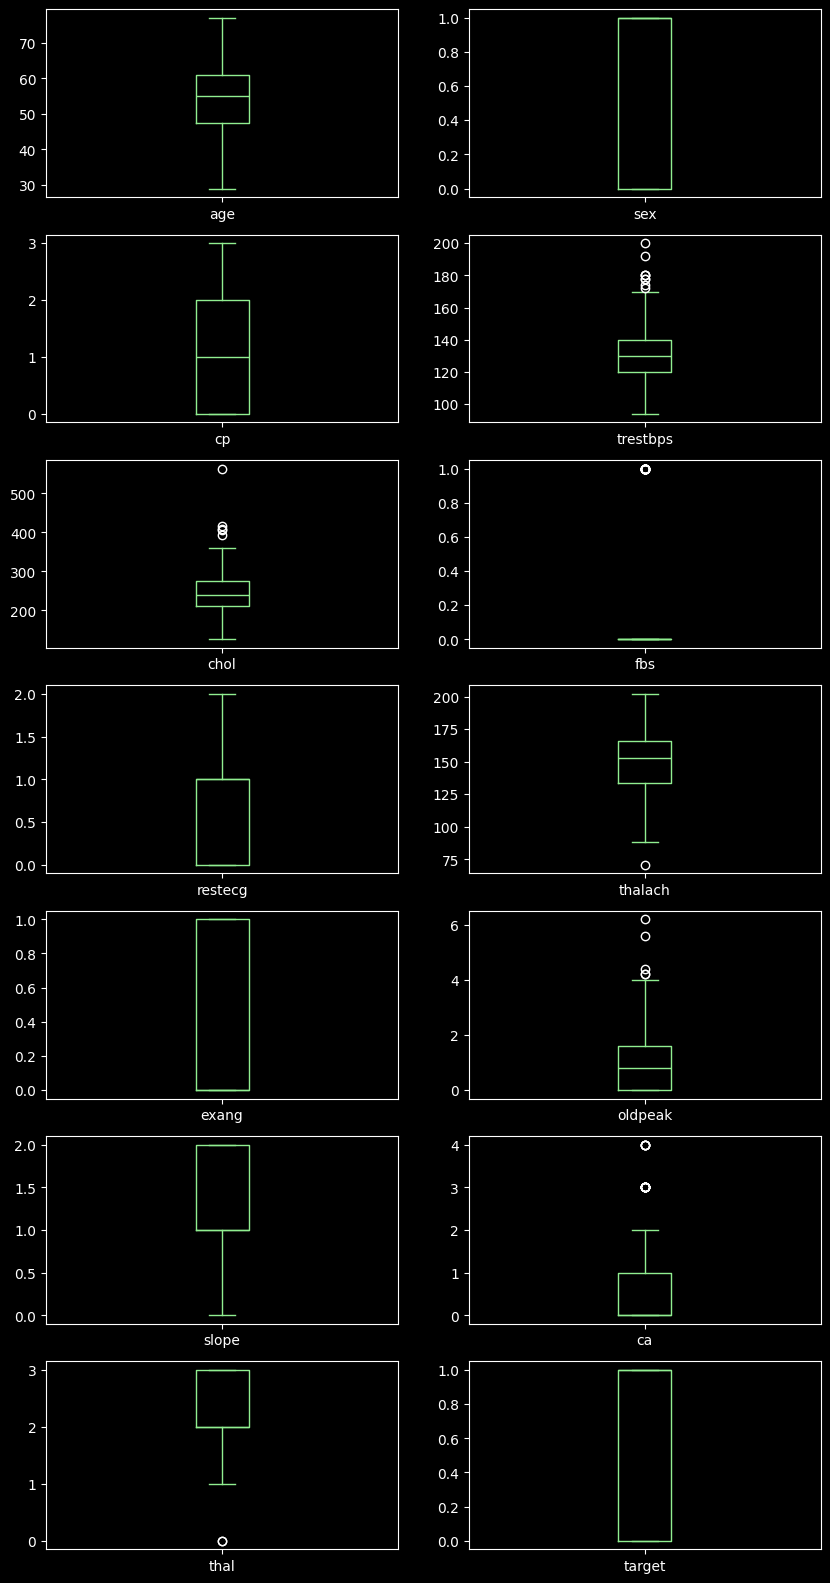

In [6]:
# Let's check for outliers

# Create box plots
heart_disease_df.plot(kind='box', subplots=True,
                      color='lightgreen', layout=(7, 2), figsize=(10, 20))
plt.show()

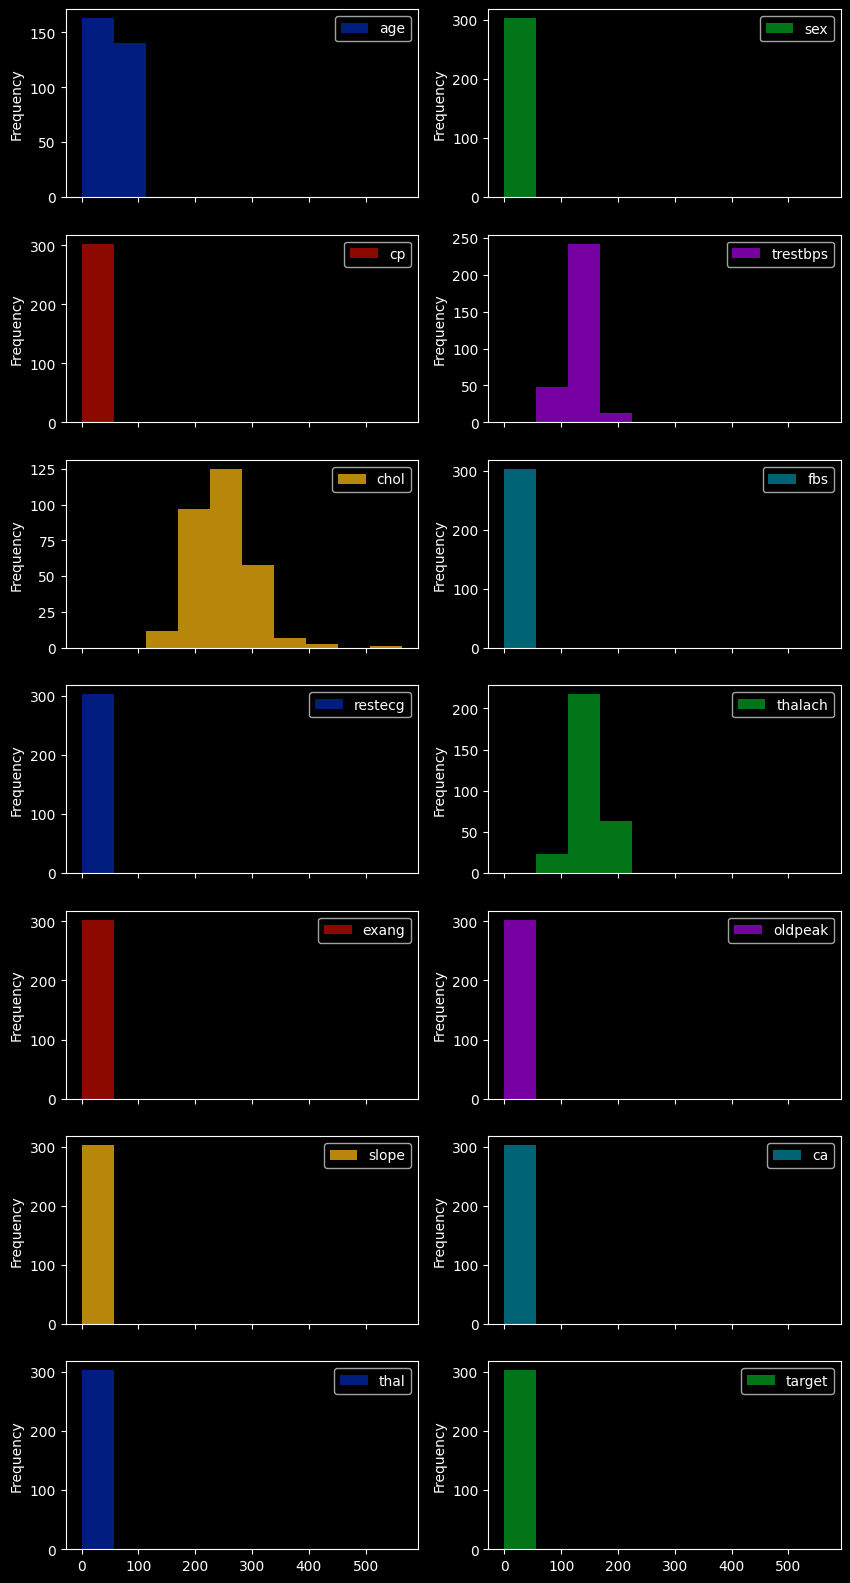

In [7]:
# Now, let's plot Histograms.
heart_disease_df.plot.hist(subplots=True, layout=(7, 2), figsize=(10, 20))
plt.show()

`Note : I think, Danial sometimes really mashes up with the workflow !!`
`Especially, when I'm trying to create notes, Just Importing New big, dirty data to follow Scikit-learn Workflow Again !!`


### **Feature Encoding :**

#### OK, for Data Preprocessing, let's convert all the columns into numerical format first !!

- Converting Categorical Variables to Numerical Ones!


In [8]:
car_sales_df = pd.read_csv("./All CSVs/car-sales-extended.csv")
car_sales_df.head(5)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [9]:
# Now let's Check it's columns, datatypes etc.
car_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           1000 non-null   object
 1   Colour         1000 non-null   object
 2   Odometer (KM)  1000 non-null   int64 
 3   Doors          1000 non-null   int64 
 4   Price          1000 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


### Here, we found 5 columns, 2 out of which aren't numerical. And as we know here.

#### **In Supervised Learning, we are trying to predict Car prices, it's a continuous value (In currencies). Hence, we should run a regressor model.**

**And also, for a regression model, we must feed it data with numerical values only!! that's why we're doing Feature Encoding.**


In [10]:
# If we Try to train ML Model without Encoding categorical variables.

# Just differentiate predictor variables and target variable. (Into x & y)


# Let's quickly Divide the Data!
from sklearn.ensemble import RandomForestRegressor
x = car_sales_df.drop("Price", axis=1)  # Predictor Variables
y = car_sales_df["Price"]  # Target Variable


Random_Forest_Reg = RandomForestRegressor()

# This will raise "ValueError".
# RandomForestregModel.fit(x, y) # i.e. Could not convert String to Float.

### Let's Encode Our Categorical Features :


In [11]:
# Scikit-learn submodule
from sklearn.preprocessing import OneHotEncoder  # Feature Encoder
# Transformer will fit Encoder within itself
from sklearn.compose import ColumnTransformer

# Let's define categorical features.
# Why Doors? Cause it has only 3 possible values. Let it categorical.
categorical_features = ["Make", "Colour", "Doors"]

# Our One_Hot Encoder object
one_hot = OneHotEncoder()

# Column Transformer : Fit desired Encoder to specific subsets of Columns.
transformer = ColumnTransformer(
    # Must be a list/tuple of Encoder and column subsets.
    transformers=[("One_Hot", one_hot, categorical_features)],
    remainder="passthrough"  # Let remaining columns stay!
)

In [12]:
# Now Let's Encode `Predictor Variables`
transformed_x = transformer.fit_transform(x)

pd.DataFrame(transformed_x)  # Encoded Variables | Everything Numerical

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


### **`One-Hot Encoder (One-Hot Encoding)`**

- One-Hot Encoding is a technique used in machine learning to convert categorical data (data that represents categories or labels) into a numerical format. It works by creating binary columns for each category or label, where each column represents the presence or absence of a specific category. This helps machine learning models work with categorical data, as they require numerical input.

- For example, if you have a "Color" column with categories like "Red," "Blue," and "Green," one-hot encoding would transform it into binary columns, each corresponding to one color. If an item is "Red," the "Red" column gets a 1, and the others get 0. This way, machine learning algorithms can handle categorical data without making assumptions about the relationships between categories.

#### **Here's one more way to do it with Pandas :**


In [13]:
# Transforms Categorical Columns via one_hot Encoding
pd.get_dummies(car_sales_df[categorical_features])

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


#### Let's split the Data into **Training/Testing sets :**


In [14]:
# Splitting the Data For training | Testing purpose.
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    transformed_x, y, test_size=.20)

##### **Let's Train our Model With brand new Encoded Variables :**


In [15]:
# Fitting the Data into Model i.e. Training
Random_Forest_Reg.fit(x_train, y_train)

Random_Forest_Reg.score(x_test, y_test)

0.22346574026570043

In [16]:
print(
    f"Total Accuracy : { Random_Forest_Reg.score(x_test, y_test) * 100:.3} %")

Total Accuracy : 22.3 %


**Hence, the Accuracy of the Model is pretty bad, this is because of the Available Feature (predictor) variables. It was really Hard to predict the Price Using only this Data.**


<hr>

### **What if we got Missing values in our DataSet??**

**Handling missing values :**

- What if got missing values in our Data set?? It can problem with outcome!
- We Must deal with missing values to ensure completeness of the data.
- Also in Feature Encoding, missing values can lead to wrong outcomes.

**There're many ways to Handle missing Data relative to the nature of Data we have!!**

1. Fill the Missing values with appropriate ones (Imputation).
2. Remove the rows with missing values.

`Has Our current DataFrame missing values ??`


In [17]:
# Check for missing values.
print("Is there any missing values ??", car_sales_df.isna().values.any())
# No, it has no missing values at all.

Is there any missing values ?? False


#### **_Let's Import Another Data Set that contains missing values to Handle it!!_**
`Note : We used pandas to fill missing values here.`  We'll also do it in skLearn.

In [18]:
# import to DataFrame
car_sales_missing_df = pd.read_csv(
    "./All CSVs/car-sales-extended-missing-data.csv")
car_sales_df.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [19]:
# Let's check Total missing values
print(f"""
    Does this DF has missing values? , {car_sales_missing_df.isna().values.any()}
    How many missing values are there? , {car_sales_missing_df.isna().values.sum()}                

    Now, we have to deal with these values !!
    It may produce wrong outcomes, incorrect data transforms etc.
""")


    Does this DF has missing values? , True
    How many missing values are there? , 249                

    Now, we have to deal with these values !!
    It may produce wrong outcomes, incorrect data transforms etc.



**Also, features encoding with this DataFrame gives error in older version of Sklearn <br>As one_hot Encoder couldn't deal with NaN values with older versions**
<br> Still, in newer versions, we must deal with missing values to get correct & complete outcome.


In [20]:
# Let's see missing values column wise.
car_sales_missing_df.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [21]:
# Filling Missing values can never be accurate!! (Of course it's dummy data at all)

# We can use central tendencies (mean/mode/median) for filling numerical columns.
# For categorical columns | let's just fill "missing" string for now.

# Fill only the Feature columns for now, we'll drop all rows missing Price (it's crucial, we have to predict it)

car_sales_missing_df["Make"].fillna("missing", inplace=True)  # Make column

car_sales_missing_df["Colour"].fillna("missing", inplace=True)  # Colour col

# We'll interpret "Doors" column as categorical | Fill it with most common value for "Doors" a.k.a "MODE"
car_sales_missing_df["Doors"].fillna(
    car_sales_missing_df.Doors.mode()[0], inplace=True)

# Filling Odometer with mean value
car_sales_missing_df["Odometer (KM)"].fillna(car_sales_missing_df["Odometer (KM)"].mean(), inplace=True)

In [22]:
# Let's check Again
car_sales_missing_df.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [23]:
# Keeping rows where "Price" is NaN, is dangerous for accuracy!!
# Hence, dropping the rows with Price as NaN

car_sales_missing_df.dropna(inplace=True)

# Cleaned Data !
print(f"{len(car_sales_missing_df)} rows remaining")
car_sales_missing_df.isna().sum()

950 rows remaining


Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

#### **What is Feature Scaling ??**

Feature scaling refers to putting all of our Features (predicting variables) on the same scale of magnitude.
<br>It comes under Data Preprocessing to make the Data Correct & clean for ML Algorithms.

#### **Why it's necessary ??**

Often, we'll have our Features with different units that can greatly vary in magnitude ranges.
<br>The values (magnitudes) of our Features can vary so much, that it makes ML Algorithms hard to find patterns and train efficiently.

It makes ML Algorithms to inaccurately calculate distances b/w two data points
<br>i.e. it may weigh **feature with high magnitude** more than the feature with **low magnitude** units.

To suppress this issue, we need to have our **Features on the same scale** i.e. on the same level of magnitude.

That is why we have to **Scale our Features**.

`Note : There are algorithms which are affected greatly by this varying ranges of Features, but also algorithms which have no effect due to this issue.`<br>

`Not all ML algorithms required feature scaling !!`



**Feature Scaling is given [Here](./Images/Feature_Scaling.png)**

I read from these 3 articles mainly provided by the Instructor!!
Given here : [1](https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/), [2](https://rahul-saini.medium.com/feature-scaling-why-it-is-required-8a93df1af310), [3](https://benalexkeen.com/feature-scaling-with-scikit-learn/)

`We'll do it when needed.`

---

#### **Let's try to fill missing values with SciKit-Learn :**

we've learned how to fill missing values with Pandas, we just filled based on overall data, **instead it is suggested to fill data separately for training and testing sets.**

`To prevent data leakage.` It should be :

* Split your data first (into train/test), always keep your training & test data separate.

* Fill/transform the training set and test sets separately (this goes for filling data with pandas as well)

* Don't use data from the future (test set) to fill data from the past (training set)

This approach is a correction in newer update of the course.<br>
`The Entire update is given in the provided` [google colab Notebook](https://colab.research.google.com/drive/162DyoCBFeufMjJI7n4XCiYpdqIdktZw_).

##### **Let's fill missing data using scikit-learn following the above approach.**

Scikit-Learn provides a class called [`sklearn.impute.SimpleImputer()`](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) which allows us to do a similar thing.

`SimpleImputer()` transforms data by filling missing values with a given `strategy` parameter.

And we can use it to fill the missing values in our DataFrame as above.

At the moment, our dataframe has no mising values.

In [24]:
car_sales_missing_df.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

Let's reimport this to have missing values. So, we can fill it with Scikit-learn.

In [25]:
car_sales_missing_df = pd.read_csv("./All CSVs/car-sales-extended-missing-data.csv")
car_sales_missing_df.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [26]:
# Let's check for missing values.
car_sales_missing_df.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

##### Let's fill missing values but at first, we'll split the dataset into separate Training and Testing sets, then fill the values.

* **We're doing this to Prevent data leaks.**
* **We shouldn't have data from test sets in our training set. To score model genuinely.**
  
  Let's split :
To begin, we'll remove the rows which are missing a `Price` value. (this shouldn't be imputed to improve efficiency.)

In [27]:
# Drop rows missing a Price value.
car_sales_missing_df.dropna(subset = "Price", inplace= True, ignore_index=True) # Drop 50 rows.
car_sales_missing_df.isna().sum() # Dropped

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [28]:
# Let's split the data into inputs(Feature variables) and labels (target).
x = car_sales_missing_df.drop('Price', axis=1) # Features
y = car_sales_missing_df['Price'] # Target


# Splitting into training and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.20) 

##### Fill missing values with scikit-learn.

In [29]:
# Fill missing values with scikit-learn | SimpleImputer
# Importing SimpleImputer for imputing missing values
from sklearn.impute import SimpleImputer
# Importing ColumnTransformer to transform specific columns with imputer.
from sklearn.compose import ColumnTransformer

# For categorical columns ('Make', 'Colour'), missing values will be filled with the string 'missing'.
category_imputer = SimpleImputer(strategy='constant', fill_value='missing')

# For the numeric column 'Doors', missing values will be filled with the most frequent value (Mode).
door_imputer = SimpleImputer(strategy='most_frequent')

# Fill numerical missing data with "mean" of that "column".
num_imputer = SimpleImputer(strategy='mean')

# Define columns to apply these imputers on.

category_columns = ["Make", "Colour"]  # Categorical columns
# Doors, though numeric, treated as categorical for mode imputation
door_column = ["Doors"]
num_columns = ["Odometer (KM)"]  # Numeric column

# Create an imputer to fill missing values (Something that fills missing data)
imputer = ColumnTransformer( # To transform different columns using multiple imputers.
    [
        # Apply category imputer to categorical columns
        ("cat_imputer", category_imputer, category_columns),
        # Apply door imputer to the 'Doors' column
        ("door_imputer", door_imputer, door_column),
        # Apply numeric imputer to the 'Odometer (KM)' column
        ("num_imputer", num_imputer, num_columns)
    ]
)

# Fit transform using x_train data on x_train.
x_train_filled = imputer.fit_transform(x_train)

# Here "x_test" is avoided to be used in fit_transform.
# To avoid "Data Leakage" from test set to training set (Improves Evaluation).

# Then, learned transform (learned via x_train) should be used on x_test to impute (fill) missing values.
x_test_filled = imputer.transform(x_test)


In [30]:
# Converting x_train_filled & x_test_filled (ndarray) to Pandas DataFrames
# We Needed Data Frames to apply Feature encoding using specific column names.

x_train_filled = pd.DataFrame(x_train_filled, columns=["Make", "Colour", "Doors", "Odometer (KM)"])
x_test_filled = pd.DataFrame(x_test_filled, columns=["Make", "Colour", "Doors", "Odometer (KM)"])

(type(x_train_filled), type(x_test_filled))

# Let's see, missing data is gone!!
x_train_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [31]:
# See filled test data if any missing value remaining?
x_test_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

#### **Now, let's Encode our categorical Features to make them numerical :**

In [32]:
# Importing "OneHotEncoder" & "ColumnTransformer" to transform categorical Features.
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Categorical features to be Encoded.
categorical_features = ["Make", "Colour", "Doors"] # Treating doors as categorical.

one_hot = OneHotEncoder() # Encoder

# Transformer to transform data using OneHotEncoder
transformer = ColumnTransformer(
    [("one_hot", one_hot, categorical_features)],
    remainder="passthrough"
)

# Transform "x_train_filled" categorical columns to numericals (Feature Encoding)
transformed_x_train_filled = transformer.fit_transform(x_train_filled)
transformed_x_test_filled = transformer.transform(x_test_filled)

Data is Filled (No-missing) & Encoded (categorical features into numerical features).

Now, let's train a regression model.

In [33]:
# Importing RandomTreeRegressor Model
from sklearn.ensemble import RandomForestRegressor

regressor_model = RandomForestRegressor() ## Initialize model

## Training Model
regressor_model.fit(transformed_x_train_filled, y_train) 

print(
    f"Model Accuracy : {regressor_model.score(transformed_x_test_filled, y_test) * 100: .2f} %")

Model Accuracy :  32.00 %
